# Google Colab开发环境配置
### @Lisquare
## 1. 下载代码

In [ ]:
!git clone https://github.com/lisquare4/FLDRL-in-Wireless-Communication


## 2. 进入工作路径

In [ ]:
%cd /content/FLDRL-in-Wireless-Communication

## 3. 载入画图脚本运行

In [6]:
import random
from libs.node import Node
from libs.node import Station
from libs.node import StationDcf
from libs.node import StationRl
from libs.channel import Channel
from tqdm import tqdm
from config import Config
import matplotlib.pyplot as plt

 - 3.1 配置文件

In [7]:
cfg = Config()
global_time = 0
channel = Channel(global_time, [])

station_num = 5
data_rate = 6 #Mbps
#All the lengeth is a mutible of slot

#incule header
pkt_len = 1560
#us
slot_len = 10
sifs = 2
ack_len = 2 + sifs
difs = 4
timeout = ack_len

frame_len = pkt_len * 8 / slot_len / data_rate
stations_list = []
total_time = 0

#station = StationDcf(i+1, frame_len, channel, global_time, i+1, timeout, ack_len, difs, sifs)
#stations_list.append(station)

for i in range(station_num):
    if cfg.stationType == "Dcf":
        station = StationDcf(i, frame_len, channel, global_time, i, timeout, ack_len, difs, sifs)
    elif cfg.stationType == "RL":
        station = StationRl(i, frame_len, channel, global_time, i, timeout, ack_len, (i+1))
    stations_list.append(station)

In [8]:
stations_list

 - 3.2 模型训练

In [9]:
if cfg.stationType == "Dcf":
    startEpoch = 0
elif cfg.stationType == "RL":
    startEpoch = stations_list[0].epoch

print("==> startEpoch: ", startEpoch)
for i in tqdm(range(startEpoch, startEpoch+cfg.NUM_EPOCHS)):
    for station in stations_list:
        station.simulate(global_time)
    global_time = global_time + 1
    channel.update_state(global_time)

    if cfg.shuffleStationList:
        random.shuffle(stations_list)

for station in stations_list:
    total_time += station.total_pkt_time

    if cfg.stationType == "RL":
        station.saveModel()
print("==> total_time:", total_time)
total_time_channel = 0
for i in range(len(channel.start) ):
    if(i > 0):
        if ((channel.start[i] - channel.start[i-1]) < frame_len):
            continue
    total_time_channel += frame_len
print("==> total_time_channel:", total_time_channel)
print("==> channel time:", channel.time)
throughput = total_time/channel.time * data_rate * 1500 / 1560
print("==> throughput:", throughput)

  0%|          | 0/10000 [00:00<?, ?it/s]

==> startEpoch:  0


100%|██████████| 10000/10000 [02:25<00:00, 68.78it/s]

==> saving model...
==> saving model...
==> saving model...
==> saving model...
==> saving model...
==> total_time: 1248.0
==> total_time_channel: 9776.0
==> channel time: 9825.0
==> throughput: 0.7328244274809161


 - 3.3 全局结果图

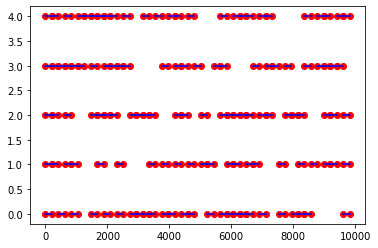

In [10]:
for i in range(len(channel.start)):
    x=[channel.start[i], channel.end[i]]
    y= [channel.operator[i], channel.operator[i]]
    plt.plot(x, y, color='b')
    plt.scatter(x, y, color='r')

 - 3.4 局部结果图

[9616, 9824]
[4, 4]
[9616, 9824]
[0, 0]
[9616, 9824]
[1, 1]
[9616, 9824]
[2, 2]
[9407, 9615]
[4, 4]
[9407, 9615]
[3, 3]
[9198, 9406]
[1, 1]
[9198, 9406]
[3, 3]
[9198, 9406]
[2, 2]
[8989, 9197]
[2, 2]


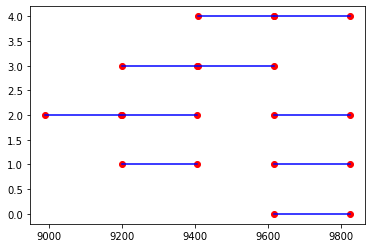

In [11]:
k = len(channel.start) - 1
for i in range(10):
    x=[channel.start[k - i], channel.end[k - i]]
    print(x)
    y= [channel.operator[k - i], channel.operator[k - i]]
    print(y)
    plt.plot(x, y, color='b')
    plt.scatter(x, y, color='r')